In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Importing the dataframes

# ChEMBL
chembl_human_dhfr = pd.read_csv('../datasets/raw/data/human_dhfr_chembl_compounds.csv')
chembl_plasmodium_dhfr = pd.read_csv('../datasets/raw/data/plasmodium_dhfr_chembl_compounds.csv')
chembl_wt_plasmodium_dhfr = pd.read_csv('../datasets/raw/data/onlywt_plasmodium_dhfr_chembl_compounds.csv')

# ZINC
zinc_human_dhfr = pd.read_csv('../datasets/raw/data/human_dhfr_zinc_structures.csv')
zinc_plasmodium_dhfr = pd.read_csv('../datasets/raw/data/plasmodium_dhfr_zinc_structures.csv')

We need only the pKi on each of the datasets to make a new dataset. We first need to extract each pKi (mean) column and then append another column with a value for serving label purposes.

In [3]:
# Printing the list of columns to see which one to pick:
print(f"Chembl Human DHFR column list: {chembl_human_dhfr.columns}\n")
print(f"Chembl Plasmodium DHFR column list: {chembl_plasmodium_dhfr.columns}\n")
print(f"Chembl WildType Only Plasmodium column list: {chembl_wt_plasmodium_dhfr.columns}\n\n\n")

# Printing the ZINC ones
print(f"ZINC Human DHFR column list: {zinc_human_dhfr.columns}\n")
print(f'ZINC lasmodium DHFR column list: {zinc_plasmodium_dhfr.columns}')

Chembl Human DHFR column list: Index(['molecule_chembl_id', 'smiles', 'pKi_mean_value', 'mean_Ki_value',
       'target_organism'],
      dtype='object')

Chembl Plasmodium DHFR column list: Index(['molecule_chembl_id', 'smiles', 'pKi_mean_value', 'mean_Ki_value',
       'pKi_first_value', 'first_Ki_value', 'pKi_last_value', 'last_Ki_value',
       'target_organism'],
      dtype='object')

Chembl WildType Only Plasmodium column list: Index(['molecule_chembl_id', 'smiles', 'pKi_mean_value', 'mean_standard_value',
       'pKi_first_value', 'first_standard_value', 'standard_units',
       'target_organism'],
      dtype='object')



ZINC Human DHFR column list: Index(['Unnamed: 0', 'zinc_id', 'smiles', 'first_affinity', 'last_affinity',
       'mean_affinity', 'chembldocid', 'reference.pubmed_id',
       'reference.chembl_id'],
      dtype='object')

ZINC lasmodium DHFR column list: Index(['Unnamed: 0', 'zinc_id', 'smiles', 'first_affinity', 'last_affinity',
       'mean_affinity', 'chem

We then pick each of the columns and add it to a dataframe.

In [4]:
# Creating each of the dataframes

# ChEMBL
chembl_mean_value_human_dhfr = pd.DataFrame()
chembl_mean_value_human_dhfr['pki_mean'] = chembl_human_dhfr['pKi_mean_value']
chembl_mean_value_human_dhfr['label'] = 'ChEMBL - Human DHFR'

chembl_mean_value_plasmodium_dhfr = pd.DataFrame()
chembl_mean_value_plasmodium_dhfr['pki_mean'] = chembl_plasmodium_dhfr['pKi_mean_value']
chembl_mean_value_plasmodium_dhfr['label'] = 'ChEMBL - P. falciparum DHFR'

chembl_mean_value_wt_dhfr = pd.DataFrame()
chembl_mean_value_wt_dhfr['pki_mean'] = chembl_wt_plasmodium_dhfr['pKi_mean_value']
chembl_mean_value_wt_dhfr['label'] = 'ChEMBL - P. falciparum WT DHFR'


# ZINC
zinc_mean_value_human_dhfr = pd.DataFrame()
zinc_mean_value_human_dhfr['pki_mean'] = zinc_human_dhfr['mean_affinity']
zinc_mean_value_human_dhfr['label'] = 'ZINC - Human DHFR'

zinc_mean_value_plasmodium_dhfr = pd.DataFrame()
zinc_mean_value_plasmodium_dhfr['pki_mean'] = zinc_plasmodium_dhfr['mean_affinity']
zinc_mean_value_plasmodium_dhfr['label'] = 'ZINC - P. falciparum DHFR'


Now we concatenate everything:

In [5]:
activities_all = pd.concat([chembl_mean_value_human_dhfr,chembl_mean_value_plasmodium_dhfr,chembl_mean_value_wt_dhfr,zinc_mean_value_human_dhfr,zinc_mean_value_plasmodium_dhfr])

Text(0.5, 0.9, 'Distributions of activites (pKi) on all datasets gathered')

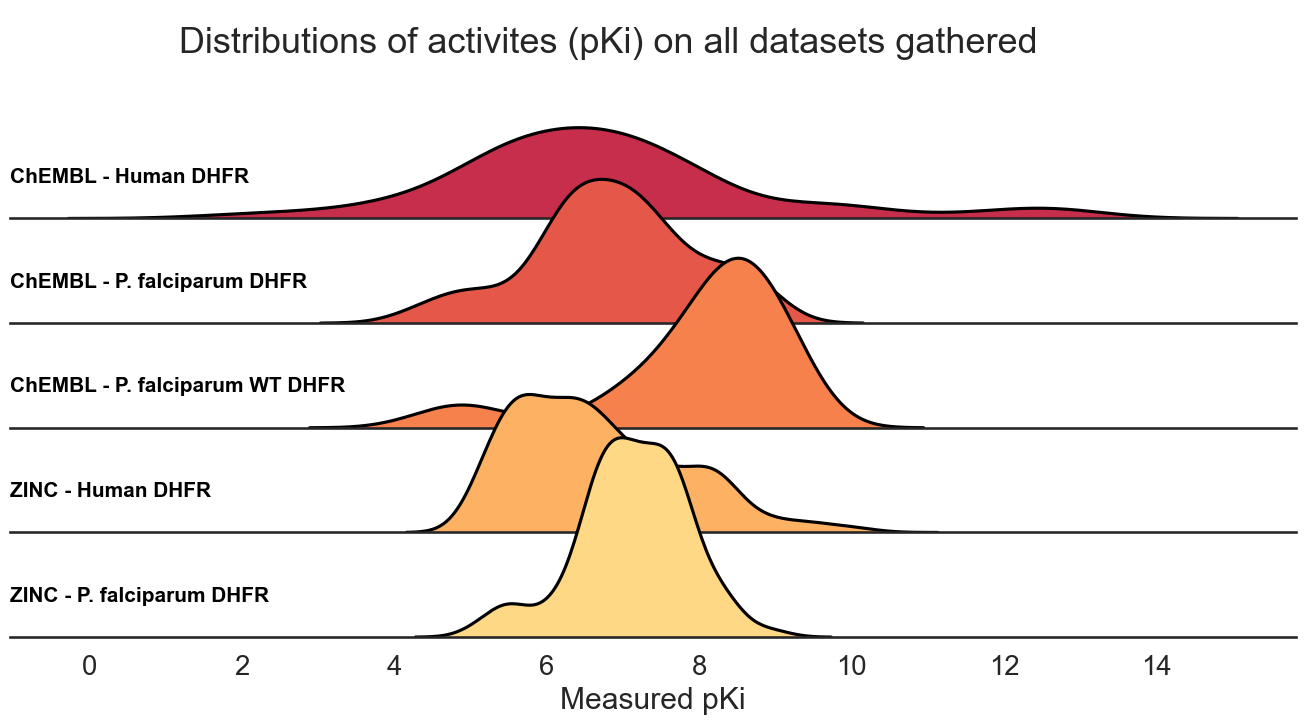

In [9]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk', font_scale=1.2)
palette = sns.color_palette("Spectral", 12)

g = sns.FacetGrid(activities_all, palette = palette, row="label", hue='label', aspect=9, height=1.6)
g.map_dataframe(sns.kdeplot, x="pki_mean", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="pki_mean", color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=20, weight='heavy',
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "label")
g.fig.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set(yticks=[], xlabel='Measured pKi', ylabel='')
g.despine(left=True)

plt.suptitle('Distributions of activites (pKi) on all datasets gathered', y=0.90)